In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import os, sys

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('poster')

import warnings
warnings.filterwarnings('ignore')

basepath = os.path.expanduser('~/Desktop/src/African_Soil_Property_Prediction/')
sys.path.append(os.path.join(basepath, 'src'))

np.random.seed(0)

In [3]:
# load files
train = pd.read_csv(os.path.join(basepath, 'data/raw/training.csv'))
test = pd.read_csv(os.path.join(basepath, 'data/raw/sorted_test.csv'))
sample_sub = pd.read_csv(os.path.join(basepath, 'data/raw/sample_submission.csv'))

In [6]:
train.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,...,REF7,RELI,TMAP,TMFI,Depth,Ca,P,pH,SOC,Sand
0,XNhoFZW5,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,...,-0.646673,1.687734,0.190708,0.056843,Topsoil,-0.295749,-0.041336,-1.129366,0.353258,1.269748
1,9XNspFTd,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,...,-0.646673,1.687734,0.190708,0.056843,Subsoil,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
2,WDId41qG,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,...,-0.814516,1.806660,0.190708,0.056843,Topsoil,-0.248601,-0.224635,-0.259551,0.064152,2.091835
3,JrrJf1mN,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,...,-0.814516,1.806660,0.190708,0.056843,Subsoil,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
4,ZoIitegA,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,...,-0.780242,0.430513,0.190708,0.056843,Topsoil,-0.438350,-0.010210,-0.699135,-0.310905,2.164148


In [7]:
test.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,...,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth
0,09gt9UK5,0.210899,0.209221,0.207645,0.208714,0.211972,0.213562,0.211267,0.208248,0.207341,...,-0.009394,0.197885,-0.622545,-0.548238,-0.637681,-0.413306,-0.130139,0.154013,-0.033905,Subsoil
1,0BVvxJ6a,0.191650,0.184120,0.177070,0.180624,0.192343,0.197502,0.187655,0.175447,0.172639,...,-0.277944,-0.851643,-0.792000,-1.058442,-0.792961,-0.785786,-0.588855,0.106200,0.559694,Subsoil
2,0KbdgApg,0.083966,0.074740,0.065596,0.069924,0.085145,0.092527,0.080625,0.064768,0.060597,...,-0.443809,-0.628839,-0.754909,-0.926716,-0.865424,-0.607359,-0.334013,-0.021042,0.182431,Topsoil
3,0MnuuduB,0.345962,0.338567,0.331786,0.336948,0.350820,0.356365,0.345285,0.332233,0.328589,...,-0.758853,-0.961080,-0.729455,-0.780148,-0.716356,-0.552923,-0.079171,0.394936,0.774477,Topsoil
4,0PcIsF9z,0.239019,0.232611,0.226266,0.229921,0.241821,0.247756,0.239242,0.227977,0.224762,...,-1.228289,1.156914,-0.696727,0.080705,0.118012,-0.920363,-0.266055,1.612625,1.199048,Subsoil


** Check if there are any missing values in the dataset. **

In [11]:
print('===== Checking if there are any missing values in the training dataset ======')
print(train.isnull().any().sum())

===== Checking if there are any missing values in the training dataset ======
0


In [12]:
print('===== Checking if there are any missing values in the test dataset =======')
print(test.isnull().any().sum())

===== Checking if there are any missing values in the test dataset =======
0


** So there are no missing values in the dataset. **

** Summary Statistics for all the variables. **

In [21]:
non_infrared_features = train.columns[3579:-5]

In [22]:
print('====== Summary statistics for training dataset ======\n')
print(train[non_infrared_features].describe())

====== Summary statistics for training dataset ======

              BSAN         BSAS         BSAV          CTI         ELEV  \
count  1157.000000  1157.000000  1157.000000  1157.000000  1157.000000   
mean     -0.572226    -0.623242    -0.691976    -0.213203     0.533953   
std       0.235748     0.239737     0.281652     0.661576     1.396132   
min      -1.007246    -0.972727    -1.175812    -0.945472    -1.326726   
25%      -0.739130    -0.781818    -0.895857    -0.548063    -0.812249   
50%      -0.608696    -0.681818    -0.761478    -0.344714     0.867038   
75%      -0.463768    -0.563636    -0.604703    -0.104917     1.292428   
max       0.217391     0.200000     0.223964     3.596526     4.891537   

               EVI         LSTD         LSTN         REF1         REF2  \
count  1157.000000  1157.000000  1157.000000  1157.000000  1157.000000   
mean      0.698859    -0.413636    -0.092569    -0.698528    -0.506340   
std       0.683280     0.686773     0.861165     0.27210

In [23]:
print('====== Summary statistics for test dataset ======\n')
print(test[non_infrared_features].describe())

====== Summary statistics for test dataset ======

             BSAN        BSAS        BSAV         CTI        ELEV         EVI  \
count  727.000000  727.000000  727.000000  727.000000  727.000000  727.000000   
mean    -0.617497   -0.639852   -0.671307   -0.108035    0.227325    0.583861   
std      0.256327    0.276273    0.307626    0.791396    1.152433    0.727844   
min     -1.000000   -1.036364   -1.142217   -1.001026   -1.395768   -0.800292   
25%     -0.789855   -0.818182   -0.873460   -0.477960   -0.870156    0.164723   
50%     -0.673913   -0.718182   -0.739082   -0.321260    0.336971    0.507289   
75%     -0.528986   -0.536364   -0.537514   -0.016621    1.205568    1.043003   
max      0.391304    0.436364    0.403136    3.596526    2.646548    2.201895   

             LSTD        LSTN        REF1        REF2        REF3        REF7  \
count  727.000000  727.000000  727.000000  727.000000  727.000000  727.000000   
mean    -0.364974    0.269816   -0.668341   -0.572728   -

** Mean values of features in the training set and test set **

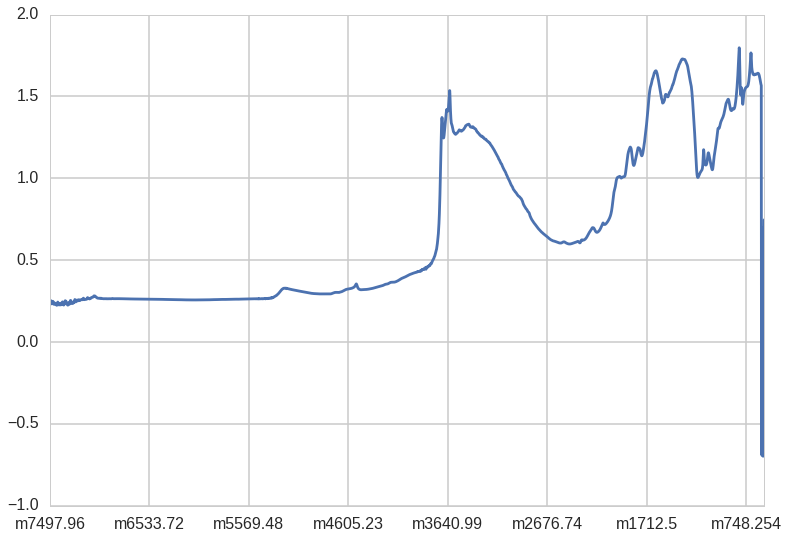

In [37]:
train[train.columns[1:-5]].mean(axis=0).plot();

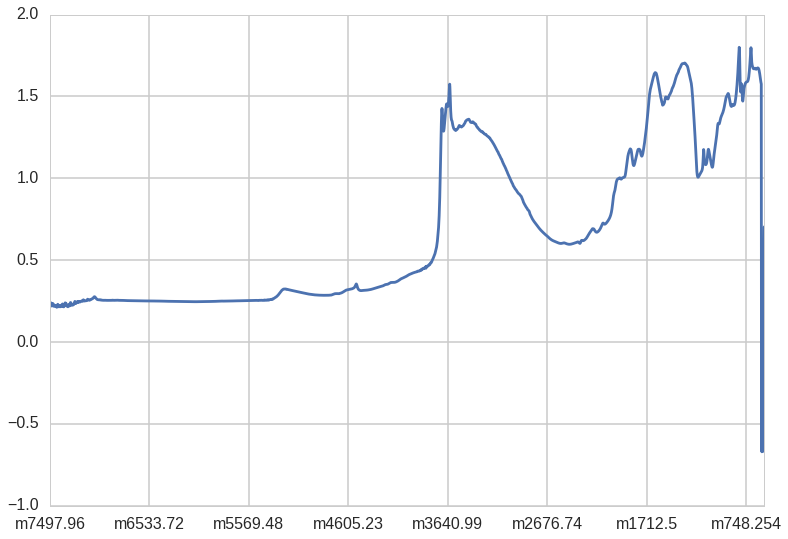

In [38]:
test[train.columns[1:-5]].mean(axis=0).plot();

** Median values of features in the training set and test set **

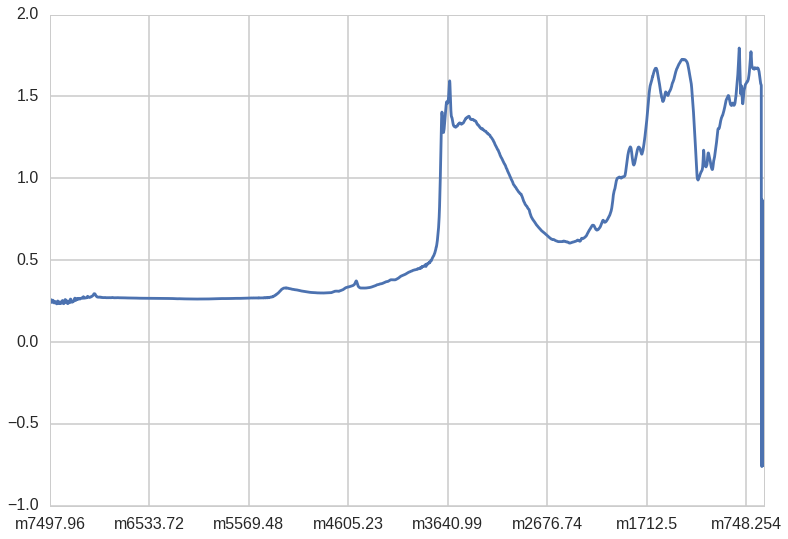

In [39]:
train[train.columns[1:-5]].median(axis=0).plot();

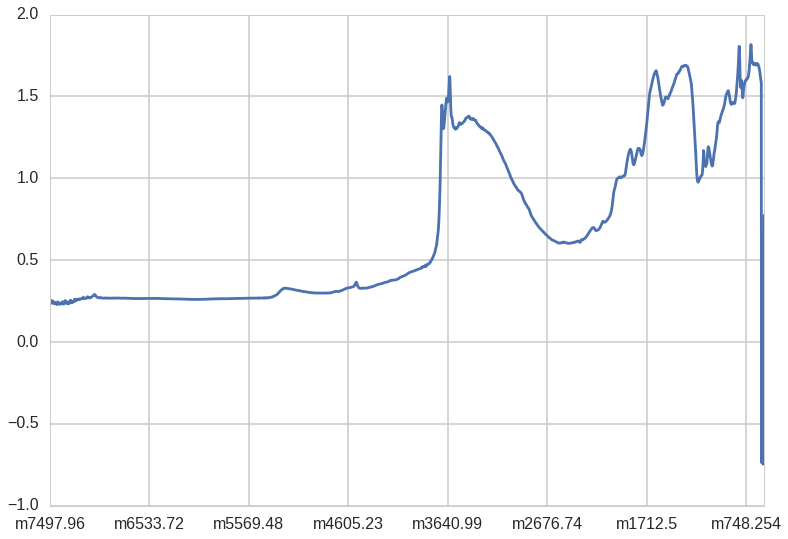

In [40]:
test[train.columns[1:-5]].median(axis=0).plot();

** Standard deviation of features in the training and test set. **

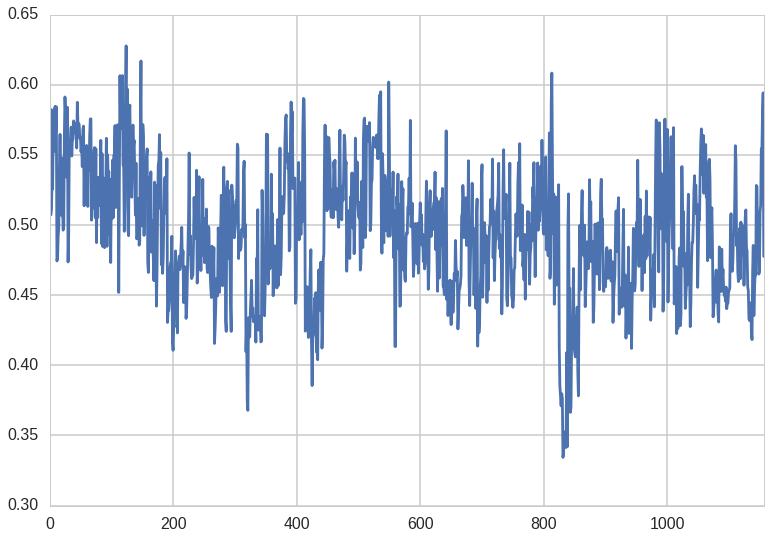

In [41]:
train[train.columns[1:-5]].std(axis=1).plot();

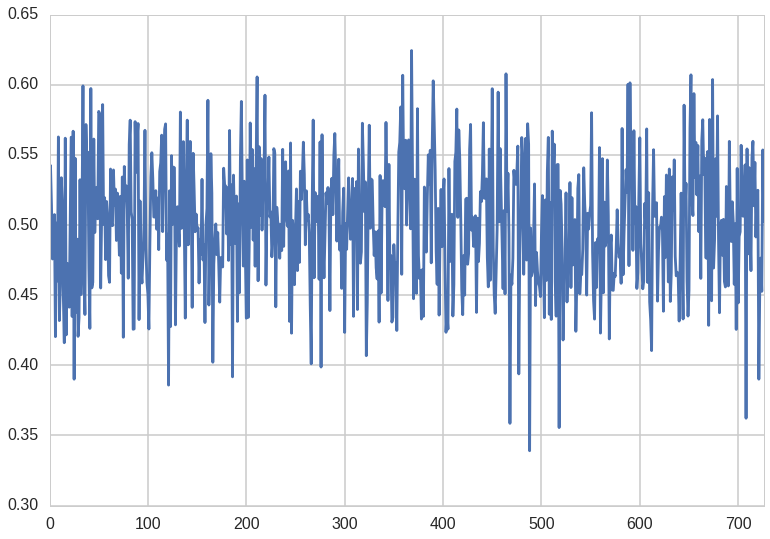

In [42]:
test[train.columns[1:-5]].std(axis=1).plot();

** Correlated Features **

In [43]:
data = pd.concat((train, test), axis=0)

In [48]:
data[train.columns[1:-6]].corr()

,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,...,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI
m7497.96,1.000000,0.999873,0.999469,0.999421,0.999580,0.999697,0.999880,0.999444,0.999231,0.999217,...,0.120030,-0.132760,-0.022717,-0.155229,-0.048323,-0.083910,-0.211041,0.259250,0.138113,0.088082
m7496.04,0.999873,1.000000,0.999854,0.999737,0.999506,0.999380,0.999836,0.999816,0.999710,0.999697,...,0.123067,-0.133833,-0.018780,-0.155552,-0.044133,-0.083822,-0.211496,0.259741,0.140825,0.090094
m7494.11,0.999469,0.999854,1.000000,0.999870,0.999250,0.998804,0.999479,0.999894,0.999920,0.999906,...,0.125214,-0.133987,-0.014707,-0.155047,-0.040022,-0.083292,-0.211130,0.260430,0.143835,0.093013
m7492.18,0.999421,0.999737,0.999870,1.000000,0.999630,0.999074,0.999433,0.999699,0.999717,0.999690,...,0.121634,-0.130026,-0.014056,-0.151598,-0.040485,-0.080705,-0.207822,0.258865,0.141566,0.092523
m7490.25,0.999580,0.999506,0.999250,0.999630,1.000000,0.999780,0.999581,0.999150,0.998981,0.998942,...,0.116000,-0.126479,-0.018236,-0.149174,-0.045872,-0.078750,-0.205516,0.256242,0.135520,0.087838
m7488.32,0.999697,0.999380,0.998804,0.999074,0.999780,1.000000,0.999726,0.998880,0.998552,0.998521,...,0.115791,-0.128497,-0.022429,-0.151498,-0.049926,-0.080215,-0.207863,0.255647,0.133035,0.084059
m7486.39,0.999880,0.999836,0.999479,0.999433,0.999581,0.999726,1.000000,0.999639,0.999402,0.999389,...,0.121921,-0.133580,-0.020083,-0.155626,-0.046599,-0.083022,-0.212024,0.257619,0.137679,0.086152
m7484.46,0.999444,0.999816,0.999894,0.999699,0.999150,0.998880,0.999639,1.000000,0.999963,0.999956,...,0.126957,-0.135958,-0.014693,-0.156994,-0.040706,-0.083970,-0.213464,0.259454,0.143362,0.090751
m7482.54,0.999231,0.999710,0.999920,0.999717,0.998981,0.998552,0.999402,0.999963,1.000000,0.999997,...,0.127462,-0.135962,-0.013699,-0.156956,-0.039696,-0.084248,-0.213318,0.260162,0.145041,0.092625
m7480.61,0.999217,0.999697,0.999906,0.999690,0.998942,0.998521,0.999389,0.999956,0.999997,1.000000,...,0.127522,-0.136324,-0.014263,-0.157489,-0.040344,-0.084812,-0.213783,0.260239,0.145228,0.092634


** Many of the features seem correlated. **

In [65]:
list(train.columns).index('m2379.76')

2655

In [72]:
train.columns[:2655:2670]

Index(['Sand'], dtype='object')